In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# PIP Installs

In [2]:
!pip install mlxtend
!pip install lightgbm
!pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git

  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /tmp/pip-req-build-juvnavc1
  Running command git clone -q https://github.com/qiskit-community/Quantum-Challenge-Grader.git /tmp/pip-req-build-juvnavc1


# Imports

In [3]:

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import networkx as nx
from IPython.display import clear_output
import plotly.graph_objects as go
from plotly.subplots import make_subplots



from sklearn import datasets
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,  f1_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

import lightgbm as lgbm

from qiskit import Aer, execute
from qiskit.opflow import Z, I, PauliExpectation, CircuitSampler, StateFn
from qiskit.utils import QuantumInstance
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector
from qiskit.circuit.library import HGate, RXGate, RYGate, RZGate, CXGate, CRXGate, CRZGate 
from qiskit.circuit.library import PauliFeatureMap, ZFeatureMap, ZZFeatureMap
from qiskit.circuit.library import TwoLocal, NLocal, RealAmplitudes, EfficientSU2
from qiskit.algorithms.optimizers import GradientDescent, COBYLA, SLSQP, ADAM
from qiskit.visualization import plot_state_city
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.algorithms import QSVC
from qc_grader.utilities.graph_util import display_maxcut_widget, QAOA_widget
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
from qiskit.utils.mitigation import complete_meas_cal, CompleteMeasFitter
from qiskit.opflow.gradients import Gradient, NaturalGradient, QFI, Hessian
#from qiskit.algorithms.MulticlassExtension import AllPairs





# Loading the IRIS Dataset

In [4]:
iris = datasets.load_iris()

print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Converting dataset to DataFrame

In [7]:
iris_df_data = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df_target = pd.DataFrame(iris.target, columns = ['Iris Label'])




# Analysing and Interpreting Data

In [8]:
iris_df_data  # printing iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
iris_df_target  # printing iris.target; 0 : Setosa, 1: Versicolour, 2 : Virginica

,Iris Label
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [10]:
iris_df_data.describe()  # standard decription of data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
iris_df_data.info()   # standard info about data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [12]:
iris_df_data.columns  # listing out column names of data

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

<AxesSubplot:>

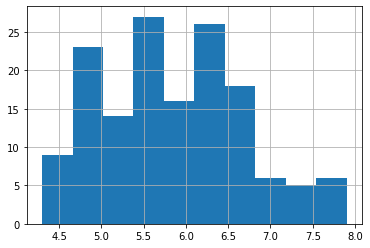

In [13]:
iris_df_data['sepal length (cm)'].hist()  # histogram plotting of data

<AxesSubplot:>

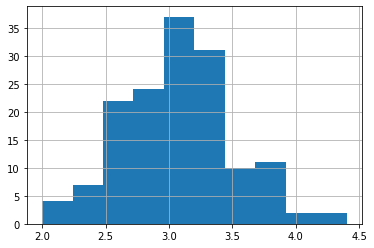

In [14]:
iris_df_data['sepal width (cm)'].hist()

<AxesSubplot:>

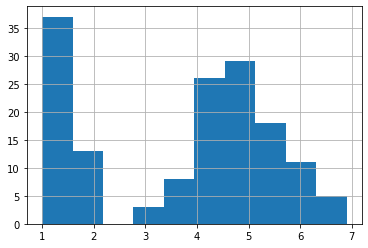

In [15]:
iris_df_data['petal length (cm)'].hist()

<AxesSubplot:>

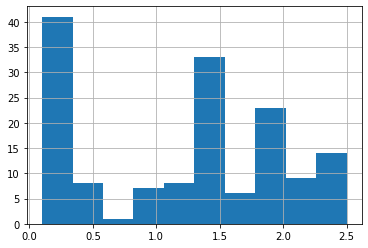

In [16]:
iris_df_data['petal width (cm)'].hist()

<AxesSubplot:>

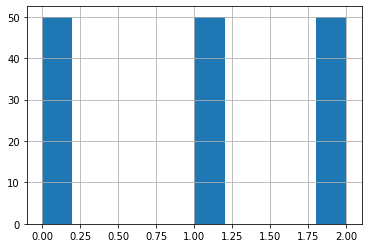

In [17]:
iris_df_target['Iris Label'].hist()  # This means all flowers have equal number of samples

In [18]:
# scatterplot of data

irisSB = sns.load_dataset('iris')
sns.set_style("darkgrid")

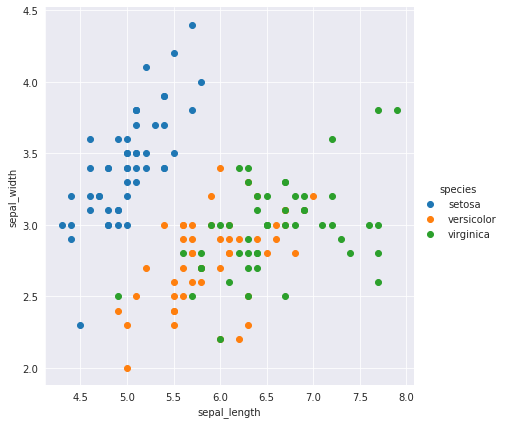

In [19]:

sns.FacetGrid(irisSB, hue = "species", height = 6).map(plt.scatter, 'sepal_length', 'sepal_width').add_legend()

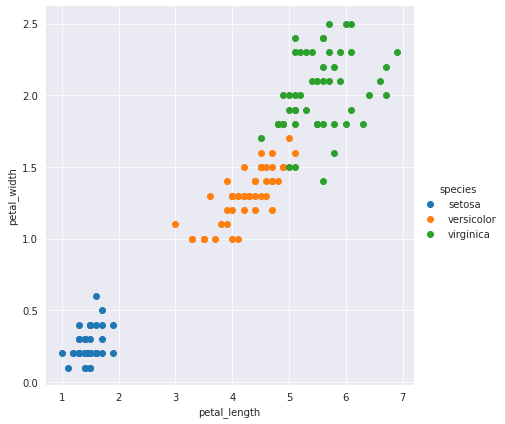

In [20]:
sns.FacetGrid(irisSB, hue = "species", height = 6).map(plt.scatter, 'petal_length', 'petal_width').add_legend()

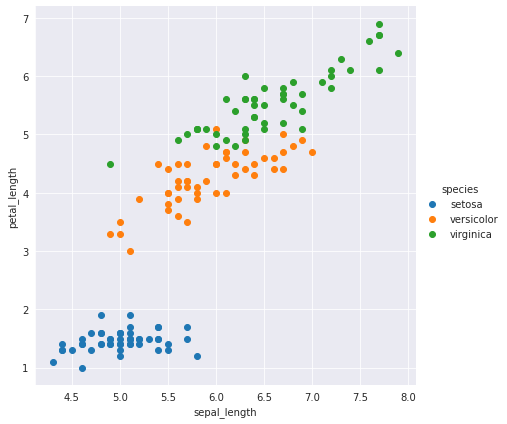

In [21]:
sns.FacetGrid(irisSB, hue = "species", height = 6).map(plt.scatter, 'sepal_length', 'petal_length').add_legend()

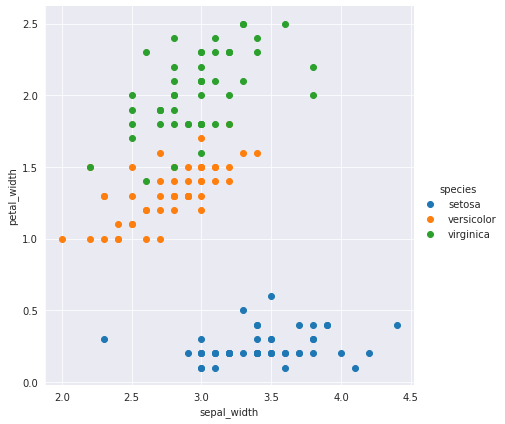

In [22]:
sns.FacetGrid(irisSB, hue = "species", height = 6).map(plt.scatter, 'sepal_width', 'petal_width').add_legend()

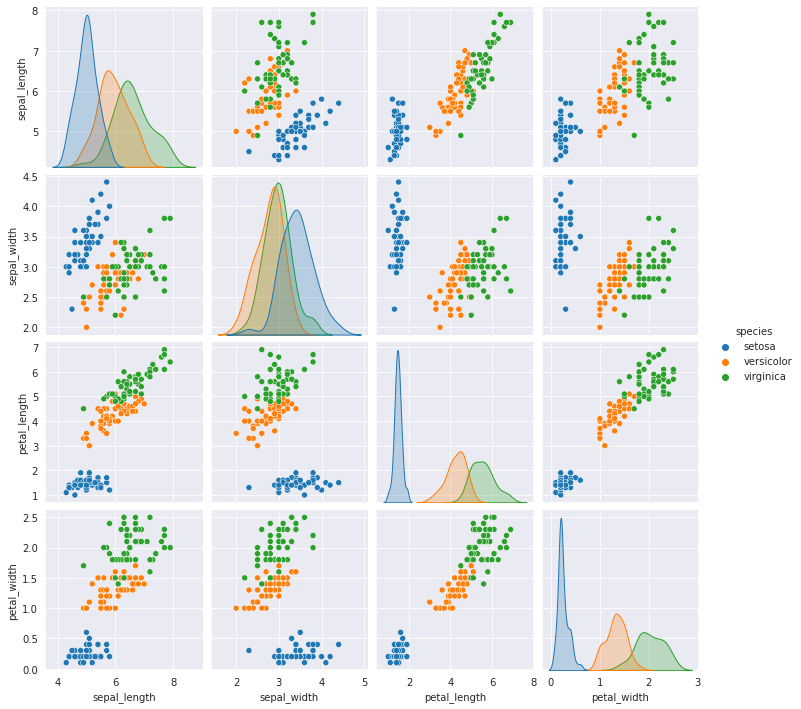

In [23]:
# Pair Plot

sns.pairplot(irisSB, hue = 'species')

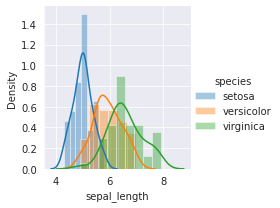

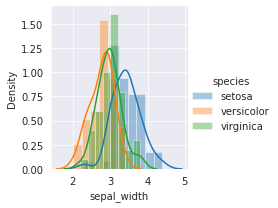

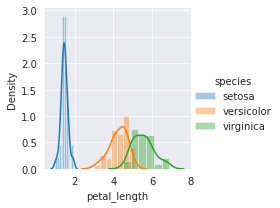

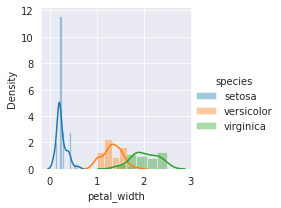

In [24]:
# Distplot for data

plot = sns.FacetGrid(irisSB, hue = "species")
plot.map(sns.distplot, "sepal_length").add_legend()
  
plot = sns.FacetGrid(irisSB, hue = "species")
plot.map(sns.distplot, "sepal_width").add_legend()
  
plot = sns.FacetGrid(irisSB, hue = "species")
plot.map(sns.distplot, "petal_length").add_legend()
  
plot = sns.FacetGrid(irisSB, hue = "species")
plot.map(sns.distplot, "petal_width").add_legend()
  
plt.show()

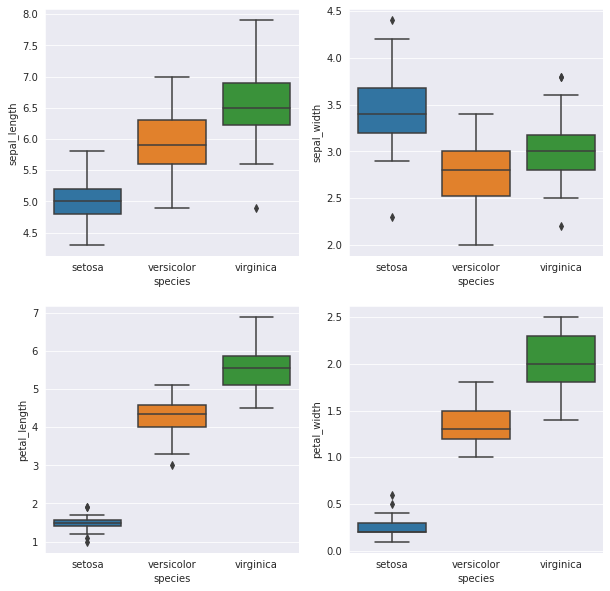

In [25]:
# Boxplot graph of features VS flower types

def graph(y):
    sns.boxplot(x = "species", y = y, data = irisSB)
  
plt.figure(figsize=(10,10))
      
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('sepal_length')
  
plt.subplot(222)
graph('sepal_width')
  
plt.subplot(223)
graph('petal_length')
  
plt.subplot(224)
graph('petal_width')
  
plt.show()

<AxesSubplot:xlabel='sepal_length'>

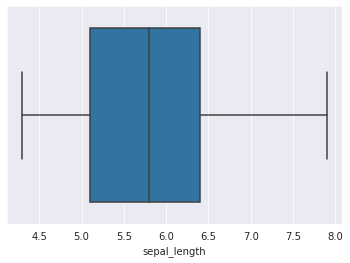

In [26]:
# Outliers for the features

sns.boxplot(x = 'sepal_length', data = irisSB)

<AxesSubplot:xlabel='sepal_width'>

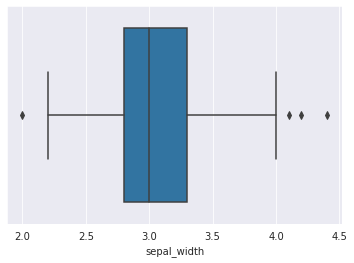

In [27]:
sns.boxplot(x = 'sepal_width', data = irisSB)

In [28]:
## To remove Sepal Width Outliers using IQR(Interquartile Range)
## Code is contained in Single Hashes!! 

## IQR
#Q1 = np.percentile(irisSB['sepal_width'], 25, interpolation = 'midpoint')
  
#Q3 = np.percentile(irisSB['sepal_width'], 75, interpolation = 'midpoint')

#IQR = Q3 - Q1
  
#print("Old Shape: ", irisSB.shape)
  
## Upper bound
#upper = np.where(irisSB['sepal_width'] >= (Q3+1.5*IQR))
  
## Lower bound
#lower = np.where(irisSB['sepal_width'] <= (Q1-1.5*IQR))
  
## Removing the Outliers
#irisSB.drop(upper[0], inplace = True)
#irisSB.drop(lower[0], inplace = True)
  
#print("New Shape: ", irisSB.shape)
  
#sns.boxplot(x = 'sepal_width', data = irisSB)

<AxesSubplot:xlabel='petal_length'>

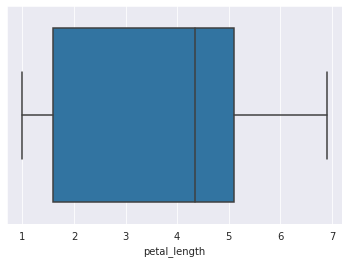

In [29]:
sns.boxplot(x = 'petal_length', data = irisSB)

<AxesSubplot:xlabel='petal_width'>

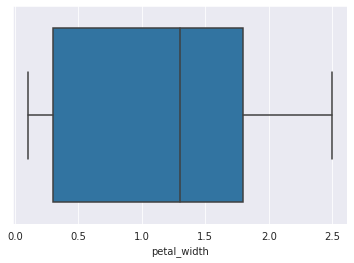

In [30]:
sns.boxplot(x = 'petal_width', data = irisSB)

In [31]:
# Correlation Matrix

iris_df_data.corr()  # Petal Length and Petal Width have high correlation

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

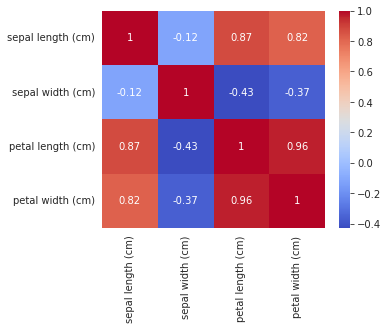

In [32]:
# Correlation Matrix Heatmap

corr = iris_df_data.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')  # cmap = 'darkgrid' for light colours


# Splitting training and testing dataset

In [33]:
sepal_length = iris['data'][:, 0]
sepal_width = iris['data'][:, 1]
petal_length = iris['data'][:, 2]
petal_width = iris['data'][:, 3]
target = iris['target']


In [34]:
#X = np.column_stack((sepal_length, sepal_width, petal_length, petal_width))
X = np.column_stack((sepal_length, sepal_width, petal_length, petal_width))
x = np.column_stack((sepal_length, sepal_width, petal_length))  # correlation of petal width and petal length is high, hence reducing variable
Y = target

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 345)

# Data Preprocessing

In [36]:
# Reduce dimensions
n_dim = 4
pca = PCA(n_components = n_dim).fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

# Normalise
std_scale = StandardScaler().fit(x_train)
x_train = std_scale.transform(x_train)
x_test = std_scale.transform(x_test)

# Scale
samples = np.append(x_train, x_test, axis = 0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
x_train = minmax_scale.transform(x_train)
x_test = minmax_scale.transform(x_test)

# Modelling with Classical SVM

In [37]:
C = 1  # Regularlization Parameter
clf_CSVC = make_pipeline(SVC(C = C, decision_function_shape = 'ovo'))   # default kernel is ' RBF '
model_CSVC = clf_CSVC.fit(x_train, y_train)  # CSVC Model Creation

In [38]:
model_CSVC.score(x_test, y_test)   # CSVC Model score against test data

1.0

In [39]:
# Plotting Decision regions
# The dimension should be 2 for plotting purposes
# Also choose 2 features of the dataset


#plot_decision_regions(X = x_test, y = y_test, clf = model_CSVC, legend = 1)

# Modelling with Quantum SVM

In [40]:
# Split dataset
sample_train, sample_test, label_train, label_test = train_test_split(
     x, Y, test_size = 0.2, random_state = 345)

# Reduce dimensions
n_dim = 3
pca = PCA(n_components = n_dim).fit(sample_train)
sample_train = pca.transform(sample_train)
sample_test = pca.transform(sample_test)

# Normalise
std_scale = StandardScaler().fit(sample_train)
sample_train = std_scale.transform(sample_train)
sample_test = std_scale.transform(sample_test)

# Scale
samples = np.append(sample_train, sample_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
sample_train = minmax_scale.transform(sample_train)
sample_test = minmax_scale.transform(sample_test)

# Select
train_size = 120
sample_train = sample_train[:train_size]
label_train = label_train[:train_size]

test_size = 30
sample_test = sample_test[:test_size]
label_test = label_test[:test_size]

In [41]:
# Backend and Quantum Instance

backend = Aer.get_backend('statevector_simulator')
q_instance = QuantumInstance(backend, shots = 8192, seed_simulator = 345, seed_transpiler = 345)

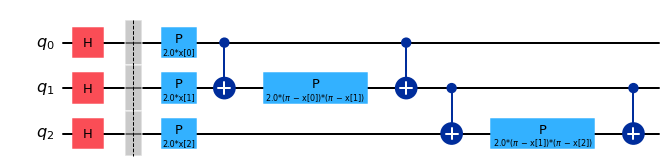

In [42]:
# Feature Map to convert classical data to quantum data, basically a parameterized Quantum Circuit
# Can be used to map seemingly unseparable data to separable form, with respect to hyperplanes, in some higher dimension
# This is achieved by e.g. rotation gate parameters depend on data features, etc.

dim = 3  # Feature Dimension = number of qubits
feature_map = ZZFeatureMap(feature_dimension = dim, reps = 1, entanglement = 'linear', insert_barriers = True, parameter_prefix = 'x').decompose() 
feature_map.draw('mpl', style = 'iqx')

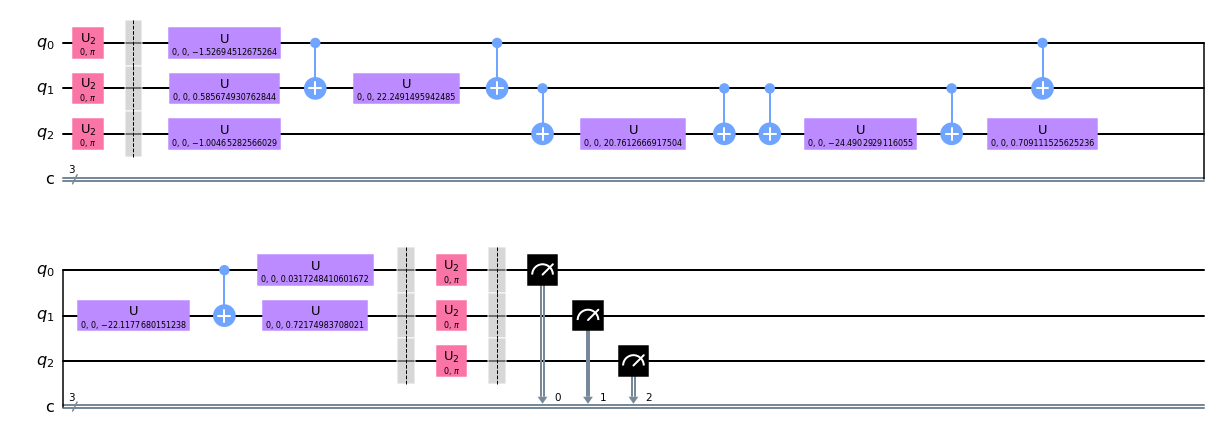

In [43]:
# Quantum Kernel

q_kernel = QuantumKernel(feature_map = feature_map, quantum_instance = q_instance)

q_circuit = q_kernel.construct_circuit(sample_train[0], sample_train[1])
q_circuit.decompose().decompose().draw(output = 'mpl')

In [44]:
# Noise Model : Measurement error


def get_noise(pm,pg):
    error_meas = pauli_error([('X',pm), ('I', 1 - pm)])
    error_gate1 = depolarizing_error(pg,1)
    error_gate2 = error_gate1.tensor(error_gate1)
    
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements
    noise_model.add_all_qubit_quantum_error(error_gate1, ["h"]) # single qubit gate error is applied to H gates
    noise_model.add_all_qubit_quantum_error(error_gate1, ["p"]) # single qubit gate error is applied to P gates
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"]) # two qubit gate error is applied to CX gates
    
    return noise_model


noise_model = get_noise(0.01,0.01)



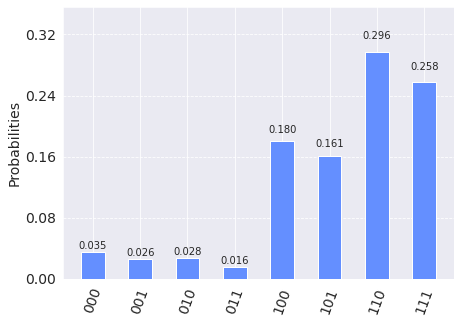

In [45]:
# Without Noise


job = execute(q_circuit, backend = backend, shots = 10000, seed_simulator = 345, seed_transpiler = 345)
counts = job.result().get_counts(q_circuit)

plot_histogram(counts)


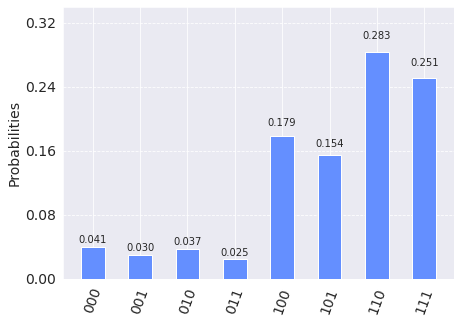

In [46]:
# With Noise


Noisy_job = execute(q_circuit, backend = backend, shots = 10000, seed_simulator = 345, seed_transpiler = 345, noise_model = noise_model)
Noisy_counts = Noisy_job.result().get_counts(q_circuit)

plot_histogram(Noisy_counts)


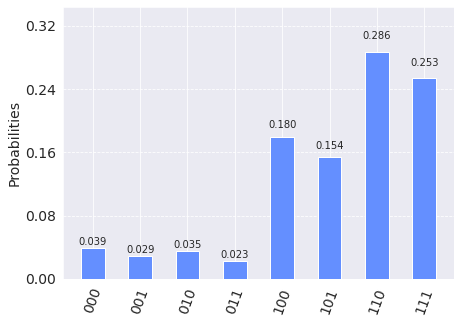

In [47]:
# Error mitigation
meas_calibs, state_labels = complete_meas_cal(qr = 3, circlabel =' mcal')


cal_results = execute(meas_calibs, backend = backend, shots = 10000, seed_simulator = 345, seed_transpiler = 345, noise_model=noise_model).result()

meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
meas_filter = meas_fitter.filter

mitigated_results = meas_filter.apply(Noisy_job.result())
mitigated_counts = mitigated_results.get_counts(q_circuit)

plot_histogram(mitigated_counts)



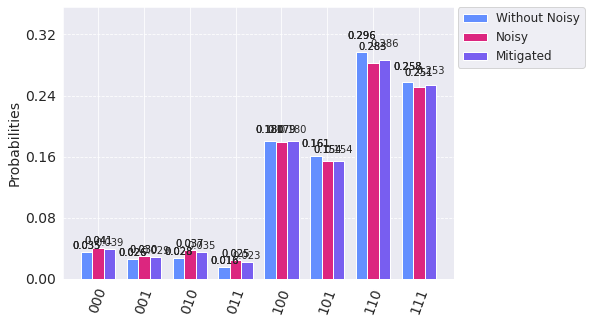

In [48]:
plot_histogram([counts, Noisy_counts, mitigated_counts], legend = ['Without Noisy','Noisy', 'Mitigated'])

# As we can see from the plot, the noise will not affect the score a lot, as the plots are similar in nature

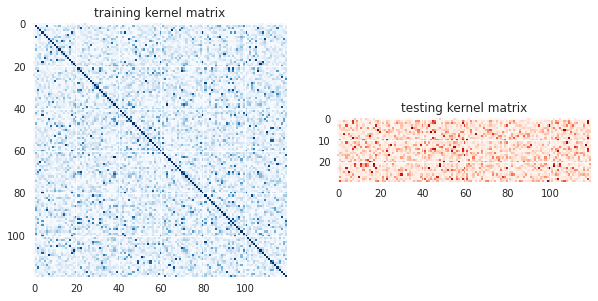

In [49]:
# Kernel Matrix Evaluation

matrix_train = q_kernel.evaluate(x_vec = sample_train)
matrix_test = q_kernel.evaluate(x_vec = sample_test, y_vec = sample_train)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(np.asmatrix(matrix_train), interpolation = 'nearest', origin = 'upper', cmap = 'Blues')
axs[0].set_title("training kernel matrix")

axs[1].imshow(np.asmatrix(matrix_test), interpolation = 'nearest', origin = 'upper', cmap = 'Reds')
axs[1].set_title("testing kernel matrix")

plt.show()

In [50]:
qpc_svc = make_pipeline(SVC(kernel='precomputed', C = 100))   # QSVC precomputed
qpc_svc.fit(matrix_train, label_train)
qpc_score = qpc_svc.score(matrix_test, label_test)

print(f'Precomputed kernel classification test score: {qpc_score}')   # best possible score we got after after trying many combinations

Precomputed kernel classification test score: 0.9666666666666667


In [51]:
""" NOTE : On using the multiclass extension function = " AllPairs " on a previous version of Qiskit, we get score of 1!
                     Hope they introduce it back! """

' NOTE : On using the multiclass extension function = " AllPairs " on a previous version of Qiskit, we get score of 1!\n                     Hope they introduce it back! '

In [52]:
""" This work of ours is a result of 'Qiskit Fall Fest Kolkata Chapter Hackathon', hosted by Mr. Ritajit Majumdar and Ms. Debasmita Bhowmik 
 from Indian Statistical Institute, in collaboration with IBM Quantum"""

" This work of ours is a result of 'Qiskit Fall Fest Kolkata Chapter Hackathon', hosted by Mr. Ritajit Majumdar and Ms. Debasmita Bhowmik \n from Indian Statistical Institute, in collaboration with IBM Quantum"

In [53]:
# Authors
# Vismay Joshi, National Institute Of Technology, Agartala
# Tanjin Adnan Abir, Jahangirnagar University
# Abhishek Rawat, TCG CREST
# Suprabhat Sinha, D Y Patil International University
# Rajat Lakhera, Sri Dev Suman Uttarakhand University

In [54]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright